In [1]:
import jax.numpy as np
import numpy as rnp
from qutip import *
from jax import grad
from jax.random import normal, PRNGKey


$R(\phi,\theta,\omega) = RZ(\omega)RY(\theta)RZ(\phi)= \begin{bmatrix}
e^{-i(\phi+\omega)/2}\cos(\theta/2) & -e^{i(\phi-\omega)/2}\sin(\theta/2) \\
e^{-i(\phi-\omega)/2}\sin(\theta/2) & e^{i(\phi+\omega)/2}\cos(\theta/2)
\end{bmatrix}$

In [36]:
def rot(phi, theta, omega):
    """Returns a rotation matrix describing rotation around Z-Y-Z axis"""
    cos = np.cos(theta/2)
    sin = np.sin(theta/2)

    return np.array(
    [
        [np.exp(-0.5j*(phi+omega))*cos, -(np.exp(0.5j*(phi-omega)))*sin],
        [np.exp(-0.5j*(phi-omega))*sin, np.exp(0.5j*(phi+omega))*cos],
        
    ]
    )

def cost(phi, theta, omega, ket):
    """Returns the fidelity between the evolved state and |0> state"""
    evolved = np.dot(rot(phi, theta, omega), ket)
    return np.absolute(np.vdot(evolved.T,basis(2,0).full()))




In [37]:
## gradient descent implementation 

#initialize parameters for descent
epochs = 200
alpha = 0.2
tol = 1e-7
diff = 1 # diff of new and prev weights should be less than diff
max_iters = 10
iters = 0
fidel_hist = []
params_hist = []
key = PRNGKey(0) #Generate a PRNG key
weights = normal(key=key, shape=(3,))
ket = rand_ket(2).full()
init_ket = ket
der_cost = grad(cost, argnums = [0,1,2])
ket_arr = []


for epoch in range (epochs):
    iters = 0
    diff = 1
    tol = 1e-7
    while np.all(diff > tol) and iters < max_iters:
        prev_weights = weights
        ket = np.dot(rot(*prev_weights),ket)
        ket_arr.append(rnp.asarray(ket))
        der = np.asarray(der_cost(*prev_weights.T,ket))
        weights = weights + alpha*der
        iters += 1
        diff = np.absolute(weights-prev_weights)
    fidel = cost(*weights.T, ket)
    progress = [epoch+1, fidel]
    fidel_hist.append(fidel)
    if ((epoch)%10==9):
        print("Epoch: {:2f} | Fidelity: {:3f}".format(*np.asarray(progress)))
    


Epoch: 10.000000 | Fidelity: 0.847530
Epoch: 20.000000 | Fidelity: 0.856666
Epoch: 30.000000 | Fidelity: 0.916518
Epoch: 40.000000 | Fidelity: 0.908035
Epoch: 50.000000 | Fidelity: 0.951908
Epoch: 60.000000 | Fidelity: 0.944212
Epoch: 70.000000 | Fidelity: 0.971307
Epoch: 80.000000 | Fidelity: 0.967180
Epoch: 90.000000 | Fidelity: 0.982510
Epoch: 100.000000 | Fidelity: 0.981019
Epoch: 110.000000 | Fidelity: 0.989208
Epoch: 120.000000 | Fidelity: 0.989097
Epoch: 130.000000 | Fidelity: 0.993299
Epoch: 140.000000 | Fidelity: 0.993723
Epoch: 150.000000 | Fidelity: 0.995831
Epoch: 160.000000 | Fidelity: 0.996355
Epoch: 170.000000 | Fidelity: 0.997410
Epoch: 180.000000 | Fidelity: 0.997860
Epoch: 190.000000 | Fidelity: 0.998399
Epoch: 200.000000 | Fidelity: 0.998732


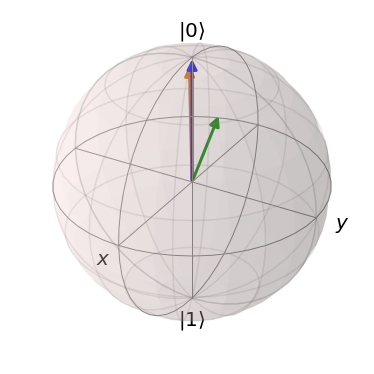

In [38]:
b = Bloch()
b.add_states(Qobj(init_ket))
final = Qobj(rnp.asarray(ket))
b.add_states(final)
b.add_states(basis(2,0))
b.show()